<a href="https://colab.research.google.com/github/trd44/Caltech-AIML-Bootcamp/blob/main/Malaria_Detection_Deep_Learning_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Capstone Project**
## Malaria Detection in Red Blood Cells using Computer Vision

### **Mounting the Drive**

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading Libraries**

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras import optimizers

from tensorflow.keras.utils import to_categorical

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### **Loading the Data**

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

### **Inspecting the Data**

#### **Checking the Shape of the Data**

In [ ]:
# Shape of images
print("Shape of train images: ", train_images.shape)
print("Shape of test images: ", test_images.shape)

Shape of train images:  (24958, 64, 64, 3)
Shape of test images:  (2600, 64, 64, 3)


In [ ]:
# Shape of labels 
print("Shape of train labels: ", train_labels.shape)
print("Shape of test labels: ", test_labels.shape)

Shape of train labels:  (24958,)
Shape of test labels:  (2600,)


**Observation:** 
- There are 24,958 samples in the training set and 2600 samples in the test set
- The number of images and labels match for the train and test sets.
- The images have been properly resized to 64x64 pixels and retained the 3 RGB channels

#### **Checking the Range of the Pixel Values**

In [ ]:
print("Training images")
print("Minimum value: ", np.min(train_images))
print("Maximum value: ", np.max(train_images))
print()
print("Test images")
print("Minimum value: ", np.min(test_images))
print("Maximum value: ", np.max(test_images))

Training images
Minimum value:  0
Maximum value:  255

Test images
Minimum value:  0
Maximum value:  255


**Observation:** Our pixel values range from 0 - 255 which is expected for 8 bit RGB values.

#### **Checking the number of parasitized and uninfected cell images**


In [ ]:
#Making a data frame with more intuitive values for displaying the information
train_labels_df = pd.DataFrame({'ParasitizedStatus':train_labels})
train_labels_df.loc[train_labels_df['ParasitizedStatus']==1, 'ParasitizedStatus'] = 'Parasitized'
train_labels_df.loc[train_labels_df['ParasitizedStatus']==0, 'ParasitizedStatus'] = 'Uninfected'

test_labels_df = pd.DataFrame({'ParasitizedStatus':test_labels})
test_labels_df.loc[test_labels_df['ParasitizedStatus']==1, 'ParasitizedStatus'] = 'Parasitized'
test_labels_df.loc[test_labels_df['ParasitizedStatus']==0, 'ParasitizedStatus'] = 'Uninfected'

print("Training set: ")
print(train_labels_df.value_counts())
print()
print("Test set: ")
print(test_labels_df.value_counts())

Training set: 
ParasitizedStatus
Parasitized          12582
Uninfected           12376
dtype: int64

Test set: 
ParasitizedStatus
Parasitized          1300
Uninfected           1300
dtype: int64


#### **Plotting the results as a pie chart to show the proportions**

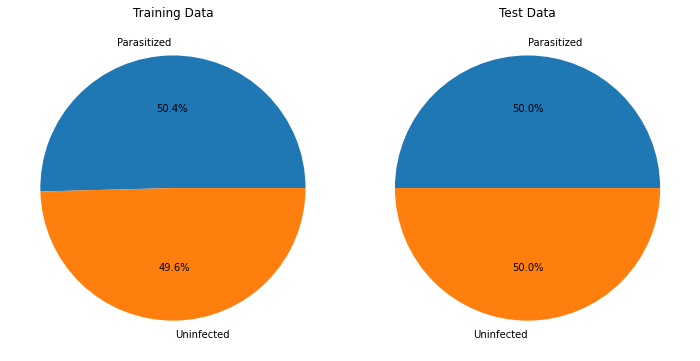

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
train_labels_df['ParasitizedStatus'].value_counts().plot.pie(
    autopct='%1.1f%%',
    title='Training Data',
    ylabel='')
plt.subplot(122)            
test_labels_df['ParasitizedStatus'].value_counts().plot.pie(
    autopct='%1.1f%%',
    title='Test Data',
    ylabel='')
plt.tight_layout()
plt.show()

**Observations:** 
- Both data sets seem very well balanced
- There are approximately the same number of parasitized and uninfected cell images in the training set
- There are exactly the same number of parasitized and uninfected cell images in the test set

### **Data Exploration**

#### **Visualizing the images**

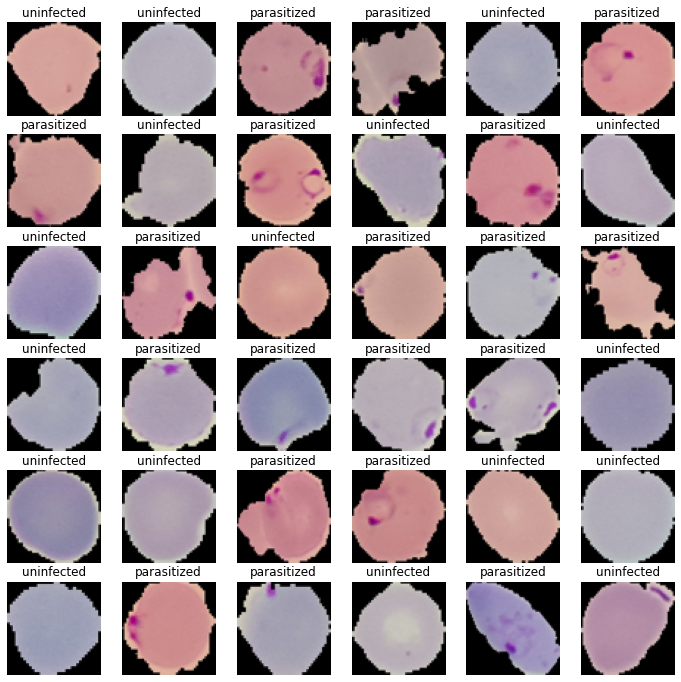

In [ ]:
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

**Observations:**
- The red blood cells come in a variety of hues such as purple, peach, and light blue
- Those hues do not appear to indicate whether or not the cell is parasitized
- The red blood cells also come in a variety of shapes
- The shape of the cell does not seem to indicate whether or not it is parasitized
- Some of the cells contain spots that are much darker than the rest of the cell
- The dark spots seem to be the cleares indicator of whether or not the cell is infected

#### **Converting from RGB to HSV to see if it could be helpful**

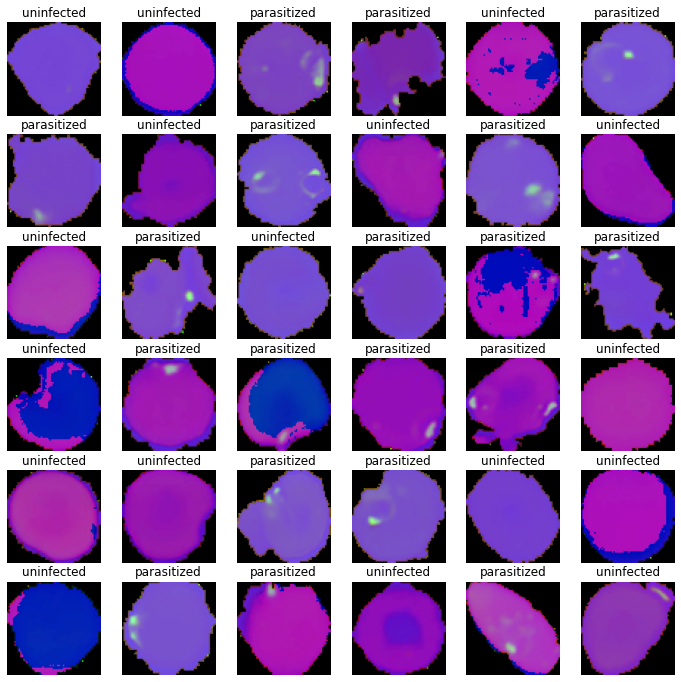

In [ ]:
import cv2

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(cv2.cvtColor(train_images[index], cv2.COLOR_BGR2HSV))

    plt.axis('off')

**Observations:**
- The parasitized red blood cells have bright green spots that the uninfected cells do not appear to have
- Converting from RGB to HSV could be helpful for training a more accurate model

### **Preparing for Deep Learning**

#### **Normalizing the images**

In [ ]:
train_images_norm = (train_images/255.0).astype('float32')

test_images_norm = (test_images/255.0).astype('float32')

#### **One Hot Encoding the Labels**

In [ ]:
train_labels_oh = to_categorical(train_labels, 2)

test_labels_oh = to_categorical(test_labels, 2)

#### **Importing the Libraries we will use for building the model**

In [ ]:
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from random import shuffle

# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

**Create a helper function for plotting train and validation accuracy at each epoch**

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

**Create a helper function for evaluating the model performance**

In [ ]:
def evaluate_model(model, test_images, test_labels):
  
  accuracy = model.evaluate(test_images, test_labels, verbose = 1)
  print('\n', 'Test_Accuracy:-', accuracy[1],'\n')

  pred = model.predict(test_images)

  pred = np.argmax(pred, axis = 1) 

  y_true = np.argmax(test_labels_oh, axis = 1)

  # Printing the classification report
  print(classification_report(y_true, pred))

  # Plotting the heatmap using confusion matrix
  cm = confusion_matrix(y_true, pred)

  plt.figure(figsize = (8, 5))

  sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

  plt.ylabel('Actual')

  plt.xlabel('Predicted')

  plt.show()  


**Create a callback to stop training early if validation accuracy decreases three epochs in a row and save the best model**

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

### **Building the Base Model**
(Model 1 from Milestone 2)

In [ ]:
# Creating sequential model
base_model = Sequential()

base_model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

base_model.add(MaxPooling2D(pool_size = 2))

base_model.add(Dropout(0.2))

base_model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

base_model.add(MaxPooling2D(pool_size = 2))

base_model.add(Dropout(0.2))

base_model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

base_model.add(MaxPooling2D(pool_size = 2))

base_model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

base_model.add(MaxPooling2D(pool_size = 2))

base_model.add(Dropout(0.2))

base_model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

base_model.add(MaxPooling2D(pool_size = 2))

base_model.add(Dropout(0.2))

base_model.add(Flatten())

base_model.add(Dense(512, activation = "relu"))

base_model.add(Dropout(0.4))

base_model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

**Compile the model**

In [ ]:
base_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Fit the model to the training data**

In [ ]:
history_base = base_model.fit(train_images_norm, train_labels_oh, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 9s 8ms/step - loss: 0.3064 - accuracy: 0.8465 - val_loss: 0.1254 - val_accuracy: 0.9796
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0836 - accuracy: 0.9722 - val_loss: 0.0806 - val_accuracy: 0.9820
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0742 - accuracy: 0.9743 - val_loss: 0.0785 - val_accuracy: 0.9782
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0680 - accuracy: 0.9767 - val_loss: 0.0797 - val_accuracy: 0.9818
Epoch 5/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0642 - accuracy: 0.9776 - val_loss: 0.0564 - val_accuracy: 0.9852
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0650 - accuracy: 0.9780 - val_loss: 0.0712 - val_accuracy: 0.9812
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0617 - accuracy: 0.9785 - val_loss: 0.1122 - val_accuracy: 0.9718


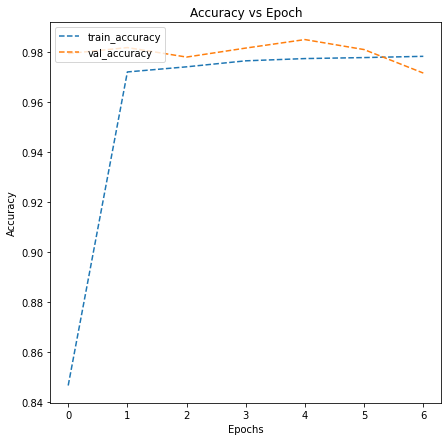

In [ ]:
plot_accuracy(history_base)

**Observations:** The validation accuracy starts very high and fluctuates slightly up and down indicating that performance may be maximized for these training conditions on this model.

#### **Evaluating the model on the test data**

82/82 [==============================] - 0s 4ms/step - loss: 0.0578 - accuracy: 0.9819

 Test_Accuracy:- 0.9819231033325195 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



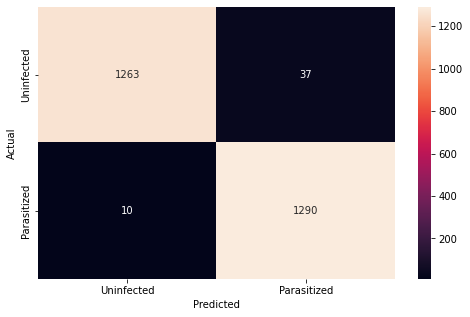

In [ ]:
evaluate_model(base_model, test_images_norm, test_labels_oh)

**Observations:**
- This model performs very well with a test accuracy of 0.9819, and weighted average precision, recall, and f1-score of 0.98 each. 

### **Fitting the base model to the HSV versions of the images**
We are converting the images to HSV to see if we can improve the performance of the base model.

#### **Converting the images**

In [ ]:
def convert_to_hsv(images):
  hsv_images = []

  for im in images:
    i = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    hsv_images.append(i)

  return np.array(hsv_images)

In [ ]:
train_images_hsv = convert_to_hsv(train_images)
test_images_hsv = convert_to_hsv(test_images)

#### **Normalizing the HSV images**

In [ ]:
train_images_hsv_n = (train_images_hsv/255.0).astype('float32')
test_images_hsv_n = (test_images_hsv/255.0).astype('float32')

In [ ]:
# Clearing backend
backend.clear_session()

history_hsv = base_model.fit(train_images_hsv_n, train_labels_oh, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 5s 8ms/step - loss: 0.3312 - accuracy: 0.8424 - val_loss: 0.0797 - val_accuracy: 0.9824
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0912 - accuracy: 0.9681 - val_loss: 0.0734 - val_accuracy: 0.9822
Epoch 3/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0763 - accuracy: 0.9736 - val_loss: 0.0628 - val_accuracy: 0.9814
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0724 - accuracy: 0.9761 - val_loss: 0.0646 - val_accuracy: 0.9816
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0682 - accuracy: 0.9762 - val_loss: 0.0368 - val_accuracy: 0.9872
Epoch 6/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0714 - accuracy: 0.9758 - val_loss: 0.0755 - val_accuracy: 0.9790
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0646 - accuracy: 0.9770 - val_loss: 0.0793 - val_accuracy: 0.9764


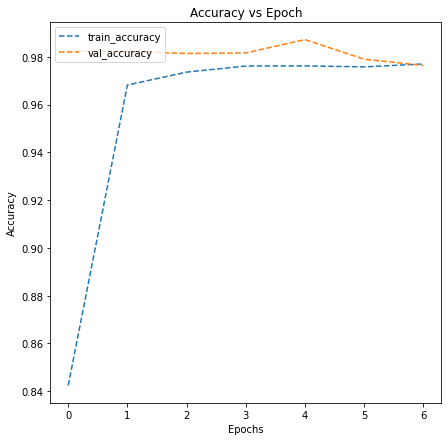

In [ ]:
plot_accuracy(history_hsv)

**Observations:** This graph looks similar to the one when the model was trained on the RGB image data. The high fluctuating validation accuracy suggests the model performance is maximized under these training conditions.

82/82 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9835

 Test_Accuracy:- 0.9834615588188171 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



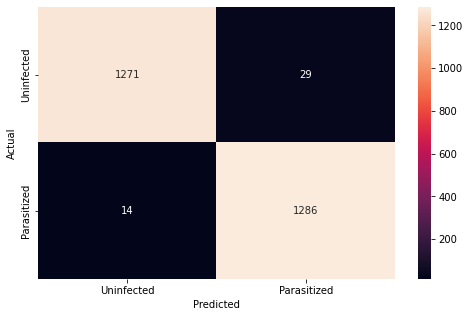

In [ ]:
evaluate_model(base_model, test_images_hsv_n, test_labels_oh)

**Observations:** 
- Converting the images to HSV before training the base model results in similar performance to when the model is trained on RGB images.
- The model seems to perform slightly worse on the HSV images than the RGB images


### **Tuning the hyper parameters with KerasTuner**
We will install and use the keras tuner library to see if tuning our hyper parameters with it can improve our performance.

In [ ]:
!pip install keras-tuner --upgrade
import keras_tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We are creating a function that takes the hyperparameter tuner as an argument to tune some of the hyper parameters in our model.

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Conv2D(
      filters = hp.Int('conv_filter_1', min_value=16, max_value=128, step=16), 
      kernel_size = 3, 
      padding = "same", 
      activation = "relu", 
      input_shape = (64, 64, 3)))

  # model.add(MaxPooling2D(pool_size = hp.Int('max_pool_1', min_value=2, max_value=4, step=1)))
  model.add(MaxPooling2D(pool_size = 2))

  model.add(Dropout(rate=hp.Choice('dropout_1', [0.1,0.2,0.3])))

  model.add(Conv2D(
      filters=hp.Int('conv_filter_2', min_value=16, max_value=128, step=16), 
      kernel_size = 3, 
      padding = "same", 
      activation = "relu"))

  # model.add(MaxPooling2D(pool_size = hp.Int('max_pool_2', min_value=2, max_value=4, step=1)))
  model.add(MaxPooling2D(pool_size = 2))

  model.add(Dropout(rate=hp.Choice('dropout_2', [0.1,0.2,0.3])))

  model.add(Conv2D(
      filters=hp.Int('conv_filter_3', min_value=16, max_value=128, step=16), 
      kernel_size = 3, 
      padding = "same", 
      activation = "relu"))

  # model.add(MaxPooling2D(pool_size = hp.Int('max_pool_3', min_value=2, max_value=4, step=1)))
  model.add(MaxPooling2D(pool_size = 2))

  model.add(Dropout(rate=hp.Choice('dropout_3', [0.1,0.2,0.3])))

  model.add(Conv2D(
      filters=hp.Int('conv_filter_4', min_value=16, max_value=128, step=16), 
      kernel_size = 3, 
      padding = "same", 
      activation = "relu"))

  # model.add(MaxPooling2D(pool_size = hp.Int('max_pool_4', min_value=2, max_value=4, step=1)))
  model.add(MaxPooling2D(pool_size = 2))

  model.add(Dropout(rate=hp.Choice('dropout_4', [0.1,0.2,0.3])))

  model.add(Flatten())

  model.add(Dense(units=hp.Int('dense_units_1', min_value=256, max_value=1024, step=256), activation = "relu"))

  model.add(Dropout(rate=hp.Choice('dropout_5', [0.1,0.2,0.3,0.4])))

  model.add(Dense(units=hp.Int('dense_units_2', min_value=256, max_value=1024, step=256), activation = "relu"))

  model.add(Dropout(rate=hp.Choice('dropout_6', [0.1,0.2,0.3,0.4])))

  model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model

Create the tuner object and set it to perform 20 trials

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20)

Initiate the search and get the best model found

In [ ]:
backend.clear_session()

tuner.search(
    train_images_norm, train_labels_oh,
    batch_size=32,
    validation_split=0.2,
    epochs=10, 
    callbacks=callbacks)

best_model = tuner.get_best_models()[0]

Trial 20 Complete [00h 00m 34s]
val_accuracy: 0.9841746687889099

Best val_accuracy So Far: 0.9927884340286255
Total elapsed time: 00h 12m 55s
INFO:tensorflow:Oracle triggered exit


View a summary of the hyperparameters the model tried and the performance of that model.

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
conv_filter_1: 48
dropout_1: 0.3
conv_filter_2: 48
dropout_2: 0.1
conv_filter_3: 48
dropout_3: 0.3
conv_filter_4: 48
dropout_4: 0.3
dense_units_1: 768
dropout_5: 0.3
dense_units_2: 1024
dropout_6: 0.3
Score: 0.9927884340286255
Trial summary
Hyperparameters:
conv_filter_1: 32
dropout_1: 0.2
conv_filter_2: 16
dropout_2: 0.2
conv_filter_3: 96
dropout_3: 0.3
conv_filter_4: 96
dropout_4: 0.2
dense_units_1: 768
dropout_5: 0.3
dense_units_2: 512
dropout_6: 0.3
Score: 0.9909855723381042
Trial summary
Hyperparameters:
conv_filter_1: 32
dropout_1: 0.1
conv_filter_2: 80
dropout_2: 0.1
conv_filter_3: 96
dropout_3: 0.3
conv_filter_4: 96
dropout_4: 0.1
dense_units_1: 768
dropout_5: 0.1
dense_units_2: 256
dropout_6: 0.1
Score: 0.9903846383094788
Trial summary
Hyperparameters:
conv_filter_1: 32
dropout_1: 0.1
conv_filter_2: 128
dropout_2: 0.2
conv_filter_3: 16
dropout_3: 0.1
conv_filter_4: 32
dropout_4:

82/82 [==============================] - 1s 4ms/step - loss: 0.1142 - accuracy: 0.9708

 Test_Accuracy:- 0.9707692265510559 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1300
           1       0.99      0.95      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



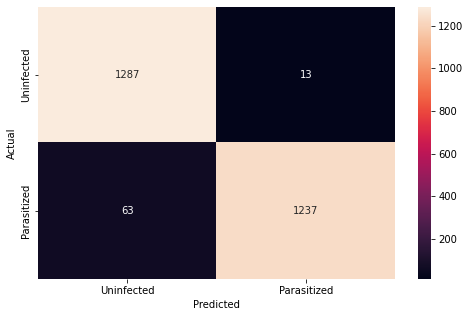

In [ ]:
evaluate_model(best_model, test_images_norm, test_labels_oh)

**Observations:** The results are still pretty good, but clearly not as good as the base model.

We will try re-fitting the best model ourselves as a sanity check

In [ ]:
# Clearing backend
backend.clear_session()

history_tune1 = best_model.fit(train_images_norm, train_labels_oh, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 10ms/step - loss: 0.0865 - accuracy: 0.9723 - val_loss: 0.1007 - val_accuracy: 0.9768
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0819 - accuracy: 0.9738 - val_loss: 0.0720 - val_accuracy: 0.9796
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0786 - accuracy: 0.9754 - val_loss: 0.0565 - val_accuracy: 0.9904
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0745 - accuracy: 0.9766 - val_loss: 0.0530 - val_accuracy: 0.9856
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0647 - accuracy: 0.9790 - val_loss: 0.0641 - val_accuracy: 0.9838
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.0728 - val_accuracy: 0.9810


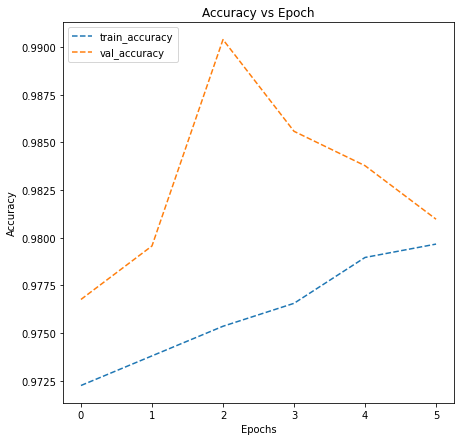

In [ ]:
plot_accuracy(history_tune1)

The training acheives a very high validation accuracy on epoch 2 but decreases in accuracy in the following epochs.

82/82 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9804

 Test_Accuracy:- 0.9803845882415771 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



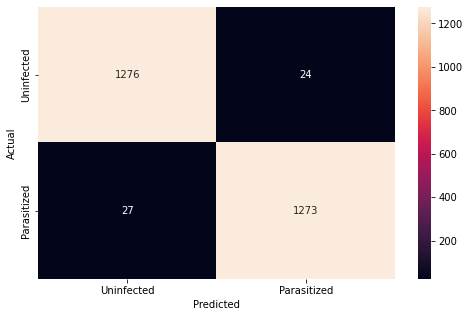

In [ ]:
evaluate_model(best_model, test_images_norm, test_labels_oh)

**Observations:** This model has a great performance as well, but still not as good as the base model.

#### **Manual Hyperparameter tuning**
I manually tuned the hyper parameters and found that increasing the filters by 2x at each convolutional layer and adding an additional Dense layer seemed to stabilize my results when I ran them multiple times using the GPU on Google Co-lab

In [ ]:
# Creating sequential model
model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(512, activation = "relu"))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation = "relu"))
model2.add(Dropout(0.2))
model2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Clearing backend
backend.clear_session()

history2 = model2.fit(train_images_norm, train_labels_oh, batch_size = 16, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
1248/1248 [==============================] - 9s 7ms/step - loss: 0.2418 - accuracy: 0.8953 - val_loss: 0.0872 - val_accuracy: 0.9796
Epoch 2/20
1248/1248 [==============================] - 8s 7ms/step - loss: 0.0807 - accuracy: 0.9728 - val_loss: 0.0902 - val_accuracy: 0.9780
Epoch 3/20
1248/1248 [==============================] - 8s 6ms/step - loss: 0.0755 - accuracy: 0.9766 - val_loss: 0.0831 - val_accuracy: 0.9786
Epoch 4/20
1248/1248 [==============================] - 8s 7ms/step - loss: 0.0717 - accuracy: 0.9765 - val_loss: 0.0633 - val_accuracy: 0.9816
Epoch 5/20
1248/1248 [==============================] - 8s 7ms/step - loss: 0.0641 - accuracy: 0.9789 - val_loss: 0.0608 - val_accuracy: 0.9792
Epoch 6/20
1248/1248 [==============================] - 8s 7ms/step - loss: 0.0660 - accuracy: 0.9791 - val_loss: 0.0815 - val_accuracy: 0.9812
Epoch 7/20
1248/1248 [==============================] - 8s 6ms/step - loss: 0.0603 - accuracy: 0.9799 - val_loss: 0.0850 - val_accuracy:

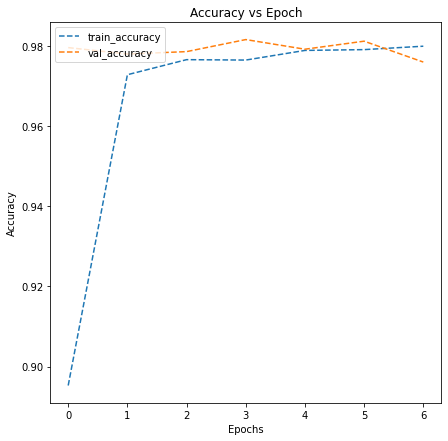

In [ ]:
plot_accuracy(history2)

**Observations:** This graph shows the same trend as previous ones where the validation accuracy starts high and fluctuates slightly each epoch. 

82/82 [==============================] - 0s 4ms/step - loss: 0.0470 - accuracy: 0.9846

 Test_Accuracy:- 0.9846153855323792 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



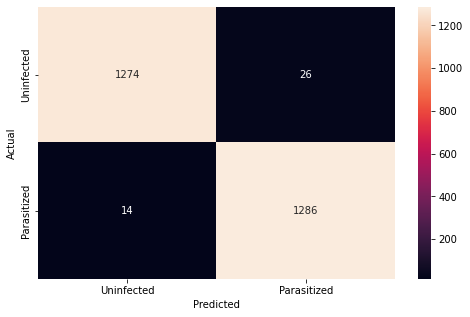

In [ ]:
evaluate_model(model2, test_images_norm, test_labels_oh)

**Observations:** The model has excellent performance and only makes a few mistakes. I noticed that I was having a difficult time improving the performance past this point so I decided to look at the images that were being misclassified.

In [ ]:
# get the predictions from the model on the test set
pred = model2.predict(test_images_norm) 

# get their classification
pred_argmax = np.argmax(pred, axis = 1) 

# get the real labels
y_true = np.argmax(test_labels_oh, axis = 1)

# get the indices of the images that were incorrectly classified
erroneous_prediciton_indices = np.where(np.not_equal(pred_argmax, y_true))[0]

#Check that the number of images matches the confusion matrix above
len(erroneous_prediciton_indices)


40

In [ ]:
#print the prediciton probabilites the model came up with
for i in erroneous_prediciton_indices:
  print(pred[i])

[0.63469225 0.3653078 ]
[0.97942924 0.02057078]
[0.9595565  0.04044353]
[0.65285283 0.3471471 ]
[0.9421194  0.05788057]
[0.52585465 0.47414538]
[0.85394645 0.14605355]
[0.67032295 0.32967708]
[0.9691     0.03089996]
[0.64098424 0.35901582]
[0.51653826 0.4834617 ]
[0.7816705  0.21832944]
[0.68533117 0.3146689 ]
[9.9995780e-01 4.2255437e-05]
[0.25140285 0.74859715]
[0.44112286 0.55887717]
[0.41345143 0.58654857]
[0.12198257 0.87801737]
[0.00252947 0.9974705 ]
[1.7632308e-12 1.0000000e+00]
[0.00355407 0.99644595]
[3.525726e-05 9.999647e-01]
[0.11207269 0.8879273 ]
[0.31478617 0.6852138 ]
[0.14224431 0.8577557 ]
[0.00163724 0.9983627 ]
[0.11857679 0.88142323]
[0.21903276 0.78096724]
[6.5592933e-05 9.9993443e-01]
[0.00542457 0.9945754 ]
[0.13119718 0.8688028 ]
[0.31011352 0.68988645]
[0.03520755 0.96479243]
[1.8228199e-06 9.9999821e-01]
[0.4156919 0.584308 ]
[0.4294384 0.5705615]
[0.07713734 0.9228626 ]
[0.0227709 0.9772291]
[0.40288812 0.5971118 ]
[0.4982532  0.50174683]


**Observations:** 
- Some of the prediction probability values indicate that the model was close to 50/50 chance that the cell was parasitized or uninfect
- Others, the model was confidently incorrect
- We can potentially flag the images the model was unsure about for human review
- Further work will have to go into how to fix the predictions the model was confidently incorrect about

#### **Visualizing the incorrectly classified images with their correct labels and predicition probabilities**

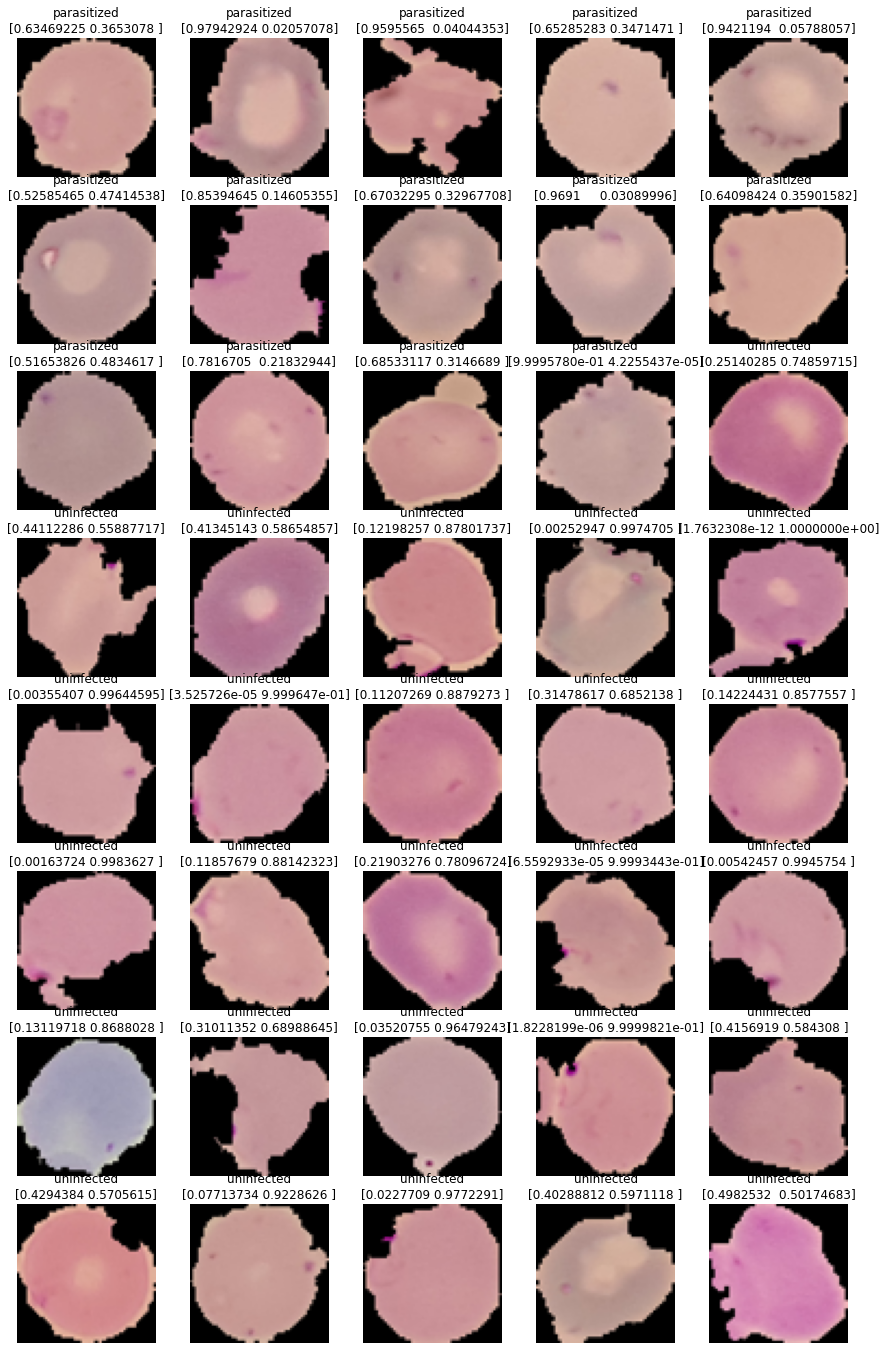

In [ ]:
plt.figure(1, figsize = (15 , 24))

for n, i in enumerate(erroneous_prediciton_indices):

    plt.subplot(8, 5, n+1)

    if test_labels[i] == 1: 

        plt.title('parasitized\n' + str(pred[i]))

    else:
        plt.title('uninfected\n' + str(pred[i]))

    plt.imshow(test_images[i])

    plt.axis('off')

**Observations:** 
- After viewing these images for myself, I can easily see how the model could have trouble classifying many of these images.
- Some of the parasitized ones have very faint marks
- Some of the uninfected ones have marks that look like parasites
- This makes me wonder if some of these images were mislabeled